In [11]:
import datetime
import pandas as pd
import pytz 
import random
import urllib
import matplotlib.pyplot as plt

In [4]:
viewsPerDay = pd.read_csv("../src/main/resources/viewEvents/aggregatedViewEvents/perDay/viewEventsAggregated.tsv", header=None, sep = '\t')
viewsPerDay_cols = ['episode_id', 'date', 'country', 'view_hours','notes']
viewsPerDay.columns = viewsPerDay_cols

In [5]:
viewsPerDay.head()

,episode_id,date,country,view_hours,notes
0,2200763,2019-01-07,LV,3.52,NaN
1,2223719,2019-01-06,AQ,3.20,NaN
2,2214169,2019-01-28,MT,5.79,NaN
3,2227771,2019-01-03,CZ,2.45,NaN
4,2227382,2019-01-17,AZ,2.24,NaN


### Views in China per day

In [9]:
views_china = viewsPerDay[(viewsPerDay['country'] == 'CN')][["date", "view_hours"]].groupby(['date'], as_index=False)['view_hours'].agg(
        lambda x: x.astype(float).sum()
    ).sort_values(by=['date'])
views_china.head(10)

,date,view_hours
0,2019-01-03,3.58
1,2019-01-04,9.81
2,2019-01-05,8.23
3,2019-01-06,3.91
4,2019-01-08,6.10
5,2019-01-10,9.38
6,2019-01-11,6.83
7,2019-01-12,9.61
8,2019-01-13,2.80
9,2019-01-14,3.93


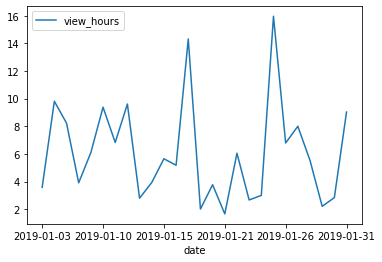

In [12]:
views_china.plot(x ='date', y='view_hours', kind = 'line')
plt.show()

### View hours per day

In [15]:
views_perday = viewsPerDay[["date", "view_hours"]].groupby(['date'], as_index=False)['view_hours'].agg(
        lambda x: x.astype(float).sum()
    ).sort_values(by=['date'])
views_perday.head(10)

,date,view_hours
0,2019-01-01,972.44
1,2019-01-02,946.43
2,2019-01-03,977.93
3,2019-01-04,1018.07
4,2019-01-05,1050.94
5,2019-01-06,946.54
6,2019-01-07,982.06
7,2019-01-08,942.99
8,2019-01-09,931.02
9,2019-01-10,946.64


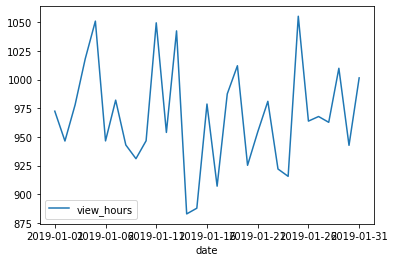

In [16]:
views_perday.plot(x ='date', y='view_hours', kind = 'line')
plt.show()

### Daily Active users

In [31]:
views = pd.read_csv("../src/main/resources/viewEvents/rawViewEvents/viewEventsFromKafka_smaller.tsv", header=None, sep = '\t')
views_cols = ['episode_id', 'date', 'country', 'view_hours','viewer_id']
views.columns = views_cols
views.head()

,episode_id,date,country,view_hours,viewer_id
0,2195087,2019-01-13,SC,4.55,6088743
1,2201521,2019-01-16,GU,4.56,9467240
2,2222699,2019-01-10,BY,4.15,5202798
3,2209746,2019-01-18,PN,1.79,6539790
4,2219015,2019-01-18,BL,2.63,4430567


In [33]:
viewers = views[["date", "viewer_id"]].groupby(['date'], as_index=False)['viewer_id'].agg(
        lambda x: x.astype(float).count()
    ).sort_values(by=['date'])
views_cols2 = ['date', 'viewers']
viewers.columns = views_cols2
viewers.head(10)

,date,viewers
0,2019-01-01,326
1,2019-01-02,316
2,2019-01-03,327
3,2019-01-04,340
4,2019-01-05,340
5,2019-01-06,313
6,2019-01-07,337
7,2019-01-08,317
8,2019-01-09,302
9,2019-01-10,333


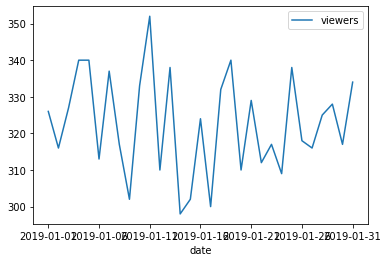

In [35]:
viewers.plot(x ='date', y='viewers', kind = 'line')
plt.show()